In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display, HTML
%matplotlib inline
font = {'size'   : 22}

matplotlib.rc('font', **font)

In [4]:
def poisson_process(beta=0.1, T=10, greedy_depth = np.inf):
    T = T
    x = np.linspace(0, T, 100)
    y = np.zeros_like(x)
    no_exp = 100 #Number of experiments
    k = 1
    for exp in range(no_exp):
#         print exp,
        X_states = np.array([1.0]) #Genesis block
        total_time = 0
        time_array = [0]
        depth_array = [1]
        total_process = 1
        while(True):
            interval = np.random.exponential(1./(total_process*beta)) #Min of i exponential random variable with mean beta
            total_time += interval
            node_level = np.where(np.random.multinomial(n=1,pvals=X_states/total_process)==1)[0][0]#chosing the birth nodelevel
            
            if node_level == X_states.shape[0] - 1: #Adding a new depth if the birth took place in last node
                X_states = np.append(X_states,[1])
                #Removing nodes before 10 steps
                if X_states.shape[0] >= greedy_depth:
                    X_states[-greedy_depth] = 0
                    print (X_states)
                    total_process = X_states.sum()
                else:
                    total_process += 1
            else:
                X_states[node_level+1] += 1
                total_process += 1
            #Updating depth array when it changes.
            if depth_array[-1] < X_states.shape[0]: 
                depth_array += [X_states.shape[0]]
                time_array  += [total_time]
            if total_time > T:
#                 print total_process, X_states.astype(int)
                break
        time_array = np.array(time_array)
        depth_array = np.array(depth_array)

        y += np.interp(x, time_array, depth_array)
        
    y /= no_exp #Avg depth

    plt.figure(figsize=(20,6))
    plt.plot(x, y-1, label= "Adversarial chain length", color="red")
    plt.plot(x, x*beta, '--', label="Adversarial base chain length", color="red")
    plt.plot(x, x*(1-beta), label="Honest users chain length", color="blue")
    plt.xlabel("Time")
    plt.ylabel("Chain length")
    plt.title("Beta = "+str(beta))
    plt.legend()
    plt.figure(figsize=(20,6))
    plt.plot(x[1:], (y[:-1]-1)/(x[1:]*beta), label= "Adverserial chain length/Adverserial base chain length", color="red")
#     plt.axhline(beta, label="Beta rate", color="blue")
    plt.xlabel("Time")
    plt.ylabel("Amplification")
    plt.title("Beta = "+str(beta))
    plt.legend()
    plt.show()
    print ("beta'/beta", np.sum((y[:-1]/x[1:]))/beta)

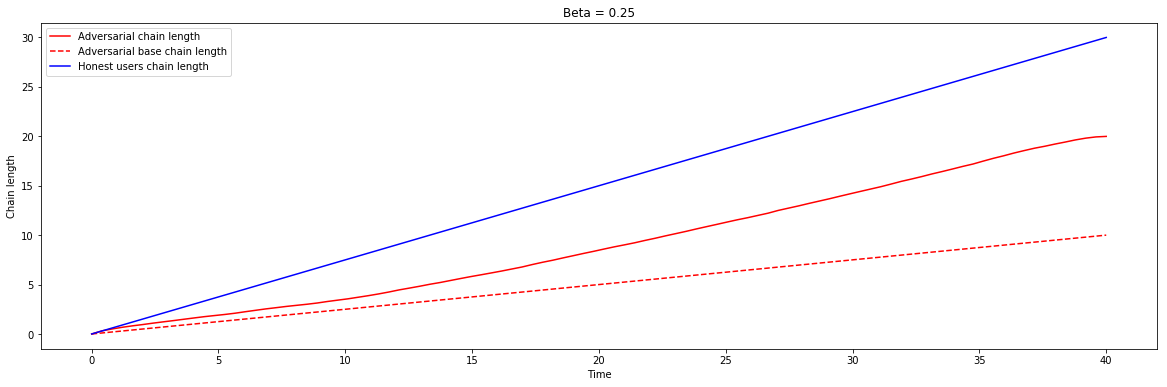

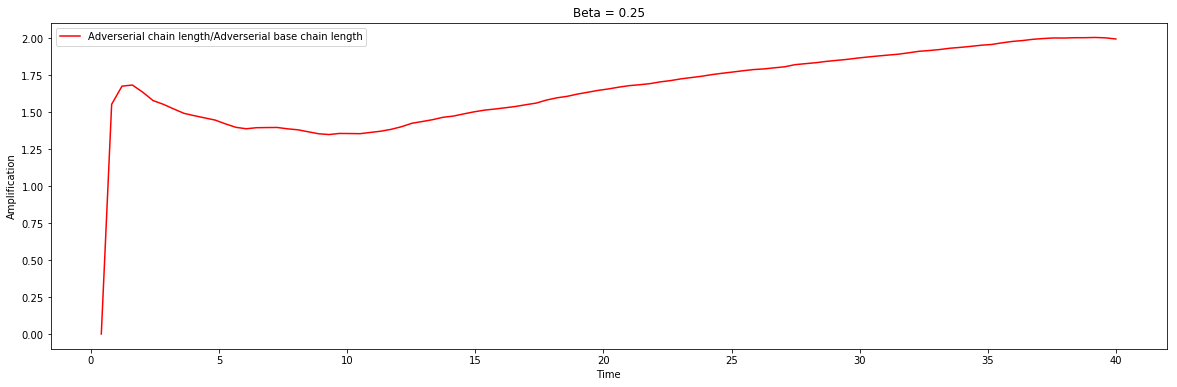

beta'/beta 215.21005793092831


In [5]:
poisson_process(beta=0.25, T = 100/2.5)

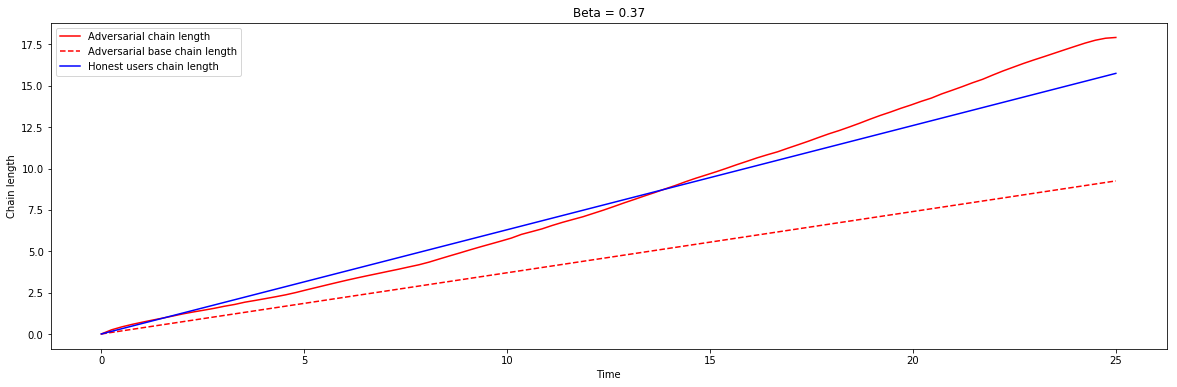

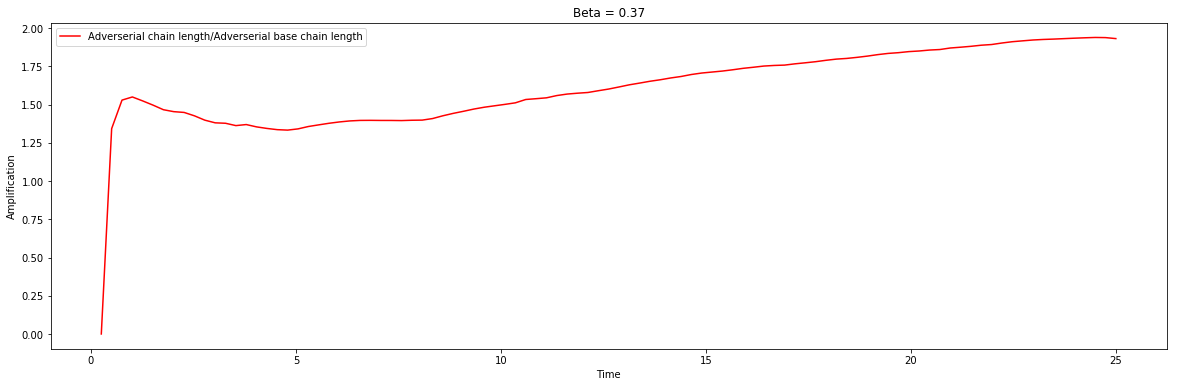

beta'/beta 214.89903004640908


In [6]:
poisson_process(beta=0.37, T = 100/4.)

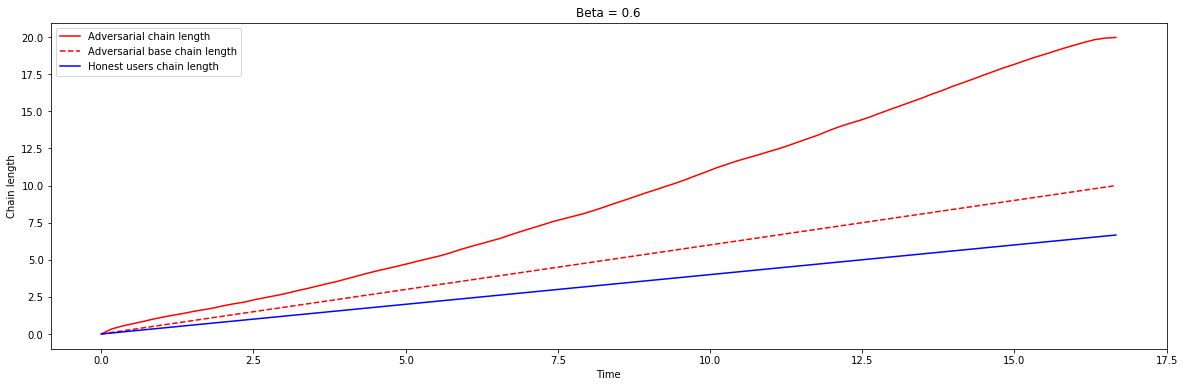

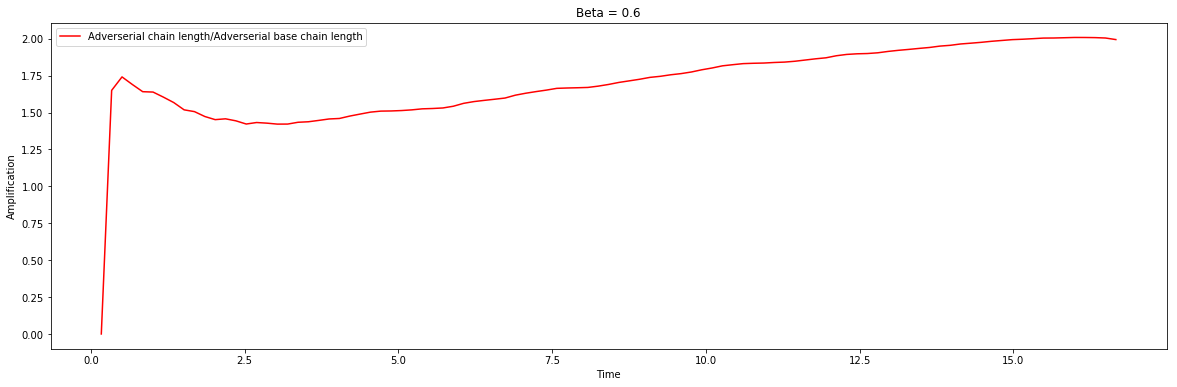

beta'/beta 219.81640523621607


In [7]:
poisson_process(beta=0.6, T = 100/6.)